In [1]:
import voila 

In [2]:
import nbgitpuller

In [3]:
import pandas as pd 
import numpy as np 
import tensorflow
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df= pd.read_csv("carprice.csv")
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [6]:
df.shape

(200, 26)

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.880000,98.49800,173.680500,65.833500,53.680500,2542.995000,126.375000,3.323350,3.258200,10.098600,103.58000,5121.250000,25.325000,30.880000,13096.278335
std,57.879185,1.226016,5.86665,12.264967,2.118957,2.457574,520.781501,41.977194,0.266971,0.315891,3.913718,39.76885,480.693529,6.571552,6.917722,7997.436540
min,1.000000,-2.000000,86.60000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.00000,4150.000000,13.000000,16.000000,5118.000000
25%,50.750000,0.000000,94.50000,166.300000,64.000000,52.000000,2143.750000,97.000000,3.150000,3.110000,8.500000,70.00000,4800.000000,19.000000,25.000000,7775.000000
50%,100.500000,1.000000,96.75000,173.000000,65.450000,54.000000,2410.000000,110.500000,3.310000,3.290000,9.000000,95.00000,5150.000000,24.500000,30.000000,10096.500000
75%,150.250000,2.000000,101.20000,180.225000,66.500000,55.525000,2910.500000,141.000000,3.580000,3.410000,9.400000,116.00000,5500.000000,30.000000,36.000000,16106.000000
max,200.000000,3.000000,120.90000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.00000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.drop(['car_ID','symboling','CarName'],axis=1,inplace=True)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

<Axes: >

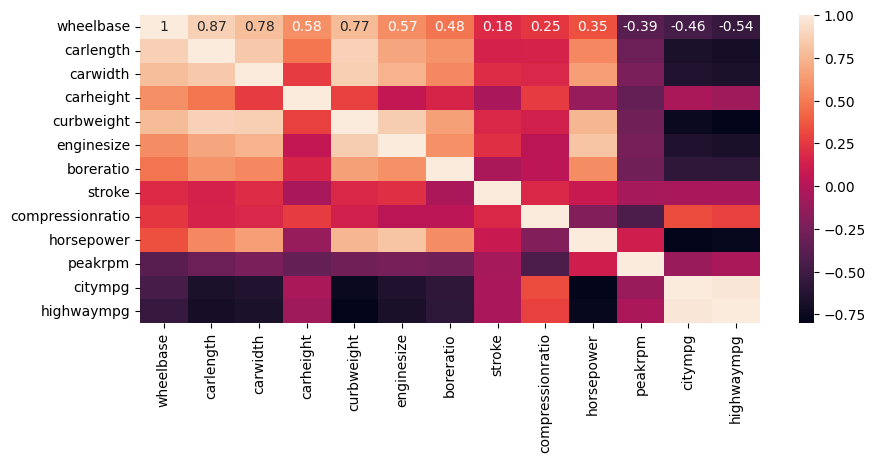

In [10]:
plt.figure(figsize=(10,4))
x_df=x.select_dtypes(include='number')
cor=x_df.corr()
sns.heatmap(cor,annot=True)

In [11]:
# With the following function we can select highly correlated features 
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset,threshold):
    col_corr=set() # Set of all the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]  # getting the name of column
                col_corr.add(col_name)
                
    return col_corr

In [12]:
# here we call the function and pass the dataset and threshold value 
# len function calculates the total number of correlation features
correlation_features=correlation(x_df,0.8)
len(set(correlation_features))

6

In [13]:
correlation_features

{'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower'}

In [14]:
# here we droping the correlation feature 
x.drop(correlation_features,axis=1,inplace=True)

In [15]:
x.shape

(200, 16)

In [16]:
for each_col in x:
    #print('\n')
    print(x[each_col].unique(), each_col)

['gas' 'diesel'] fueltype
['std' 'turbo'] aspiration
['two' 'four'] doornumber
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] carbody
['rwd' 'fwd' '4wd'] drivewheel
['front' 'rear'] enginelocation
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3] wheelbase
[48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.8 50.6 59.8 50.2
 52.6 54.5 58.3 53.3 54.1 51.  53.5 51.4 52.8 47.8 49.6 55.5 54.4 56.5
 58.7 54.9 56.7 55.4 54.8 49.4 51.6 54.7 55.1 56.1 49.7 56.  50.5 55.2
 52.5 53.  59.1 53.9 55.6 56.2 57.5] carheight
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] enginetype
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] cylindernumber
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] fuelsystem
[3.47 2.68 3.

In [17]:
# Here we done encoding for  categorical features using get dummies method 
encode = pd.get_dummies(x, columns = ['fueltype','aspiration','doornumber','carbody','drivewheel',
                                      'enginelocation','enginetype','cylindernumber','fuelsystem'],drop_first=True)

In [18]:
# converting the values of y in numpy array 
y=y.values

In [19]:
# here encode contains indepedent features and
# y contains dependent column
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(encode,y,test_size=0.2,random_state=15)
# here 0.2 means , 80 percent of data is used for training and remaining 20 percent of data used for testing 

In [20]:
#pip install SciKit-Learn

In [21]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [22]:
x_train.shape

(160, 36)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import ReLU

In [24]:
seq=Sequential()

In [25]:
#add input layer
seq.add(Dense(units=36,activation='ReLU'))
seq.add(Dropout(0.5))

In [26]:
#adding hidden lauyer
#seq.add(Dense(units=26,activation='ReLU'))
#seq.add(Dropout(0.3))

In [27]:
#adding second hidden layer
seq.add(Dense(units=18,activation='ReLU'))
seq.add(Dropout(0.3))

In [28]:
seq.add(Dense(units=8,activation='ReLU'))
seq.add(Dropout(0.1))

In [29]:
#adding output layer
seq.add(Dense(units=1,activation='linear'))

In [30]:
seq.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])

In [31]:
seq.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1500,batch_size=20,verbose=1)

Epoch 1/1500
8/8 [==============================] - 1s 37ms/step - loss: 225858480.0000 - mae: 12800.6768 - val_loss: 272161056.0000 - val_mae: 14272.8486
Epoch 2/1500
8/8 [==============================] - 0s 7ms/step - loss: 225845200.0000 - mae: 12800.1855 - val_loss: 272148384.0000 - val_mae: 14272.4082
Epoch 3/1500
8/8 [==============================] - 0s 7ms/step - loss: 225839712.0000 - mae: 12799.9492 - val_loss: 272133984.0000 - val_mae: 14271.9219
Epoch 4/1500
8/8 [==============================] - 0s 7ms/step - loss: 225822432.0000 - mae: 12799.3262 - val_loss: 272117376.0000 - val_mae: 14271.3623
Epoch 5/1500
8/8 [==============================] - 0s 7ms/step - loss: 225809536.0000 - mae: 12798.8574 - val_loss: 272095904.0000 - val_mae: 14270.6582
Epoch 6/1500
8/8 [==============================] - 0s 7ms/step - loss: 225788976.0000 - mae: 12798.1650 - val_loss: 272070144.0000 - val_mae: 14269.8223
Epoch 7/1500
8/8 [==============================] - 0s 7ms/step - loss: 225

In [32]:
y_pred=seq.predict(x_test) # using our regression model we predict the predicted values using testing dataset 
y_pred

2/2 [==============================] - 0s 9ms/step


array([[26330.08  ],
       [15007.387 ],
       [21753.756 ],
       [13863.393 ],
       [31533.268 ],
       [ 7827.5737],
       [ 3093.818 ],
       [12002.182 ],
       [ 7109.814 ],
       [10144.477 ],
       [ 9172.483 ],
       [23066.479 ],
       [ 5443.0674],
       [ 6489.1025],
       [11827.828 ],
       [ 6685.0566],
       [16980.787 ],
       [11268.055 ],
       [ 7913.183 ],
       [21193.98  ],
       [14532.488 ],
       [ 6299.608 ],
       [11268.055 ],
       [13552.578 ],
       [ 9224.588 ],
       [ 6895.011 ],
       [ 8558.707 ],
       [20528.736 ],
       [ 5970.1064],
       [ 4934.195 ],
       [ 6259.702 ],
       [ 8107.226 ],
       [12275.084 ],
       [30351.736 ],
       [ 7453.0933],
       [ 9366.34  ],
       [ 8290.671 ],
       [12239.179 ],
       [ 5852.5205],
       [17656.697 ]], dtype=float32)

In [33]:
y_test

array([36000.   , 13295.   , 20970.   , 17669.   , 34028.   , 10295.   ,
        6479.   , 11199.   ,  5118.   , 13645.   , 13845.   , 35056.   ,
        5348.   ,  7463.   , 15645.   ,  7609.   , 17859.167, 16630.   ,
        7995.   , 18420.   , 18150.   ,  7295.   , 11900.   , 16695.   ,
        9298.   ,  8358.   , 10198.   , 18280.   ,  6229.   ,  5572.   ,
        6649.   ,  9995.   , 18150.   , 34184.   ,  7053.   , 16500.   ,
        8189.   , 17950.   ,  7349.   , 18399.   ])

In [34]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.8007749560338548

In [35]:
 r2 = seq.evaluate(x_test, y_test, verbose=0)
print(f'R-squared on Test Data: {r2}')

R-squared on Test Data: [13636381.0, 2611.51123046875]
